Macarena Benjamin

1) Investigar la diferencia entre números pseudo aleatorios y cuasi aleatorios, desarrolle de forma teórica y
ejemplifique. Muestre, en caso de ser posible, su diferencia mediante un algoritmo en Python y
gráficamente.


2) Explique y desarrolle que es un proceso de difusión con saltos, ejemplifique y prográmelo en Python con el
objetivo de poder obtener las trayectorias de precios del activo subyacente y visualizarlo gráficamente. En
caso de ser posible utilice datos de mercado.

# Ejercicio 1

Diferencias entre numeros Pseudoaleatorios y Cuasi-aleatorios



1.  **Numeros Pseudoaleatorios (PRNG)**:

* Generados por algoritmos deterministas.
* Simulan aleatoriedad pero son reproducibles (dada una semilla).

Ejemplo: numpy.random.uniform(), random.random().


2.  **Numeros Cuasi-aleatorios (QRNG)**:

* Diseñados para cubrir el espacio de forma más uniforme.
* Utiles en metodos como Cuasi-Monte Carlo (QMC).
* No necesariamente "aleatorios", pero tienen mejor cobertura del espacio.

Ejemplo: secuencias de Halton, Sobol.



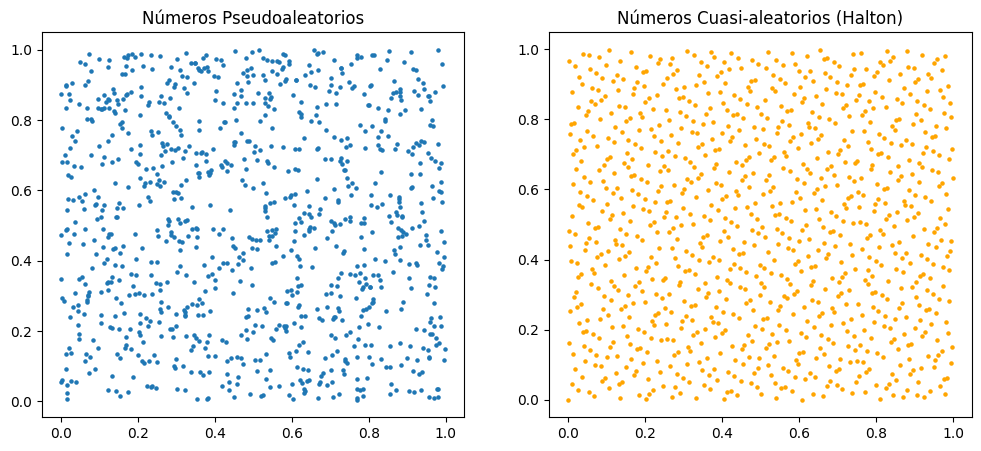

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

# Pseudoaleatorios
np.random.seed(2025)
pseudo_random = np.random.uniform(0, 1, size=(1000, 2))

# Cuasi-aleatorios: Halton
sampler = qmc.Halton(d=2, scramble=False)
quasi_random = sampler.random(n=1000)

# Graficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(pseudo_random[:, 0], pseudo_random[:, 1], s=5)
ax[0].set_title("Números Pseudoaleatorios")
ax[1].scatter(quasi_random[:, 0], quasi_random[:, 1], s=5, color='orange')
ax[1].set_title("Números Cuasi-aleatorios (Halton)")
plt.show()


Los cuasi-aleatorios cubren el espacio más uniformemente.

# Ejercicio 2

Ingresar ticker:NVDA


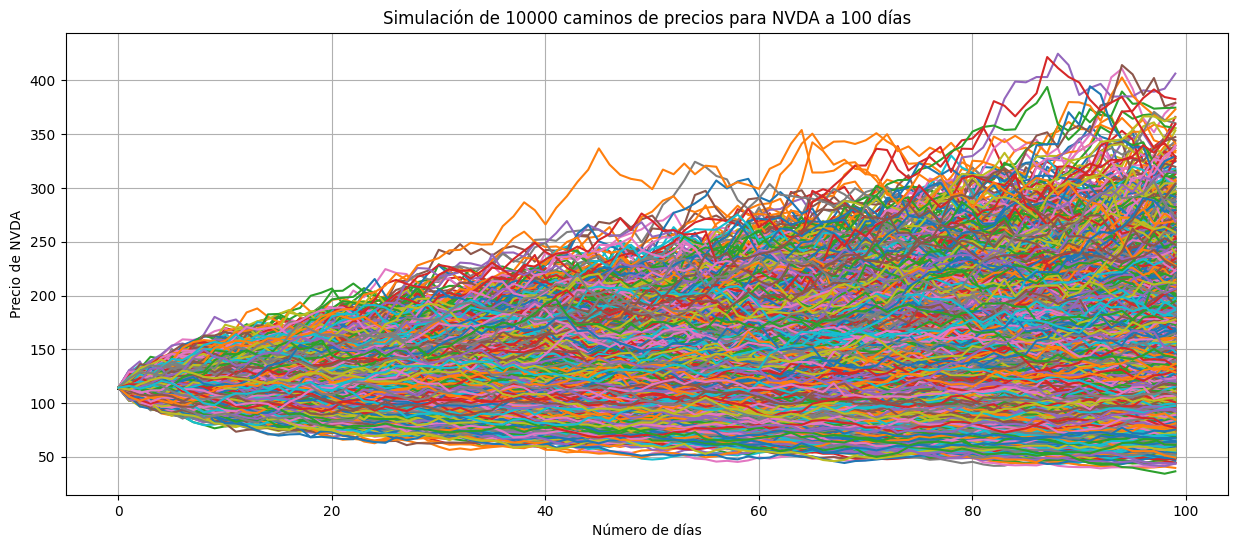

<Figure size 1000x600 with 0 Axes>

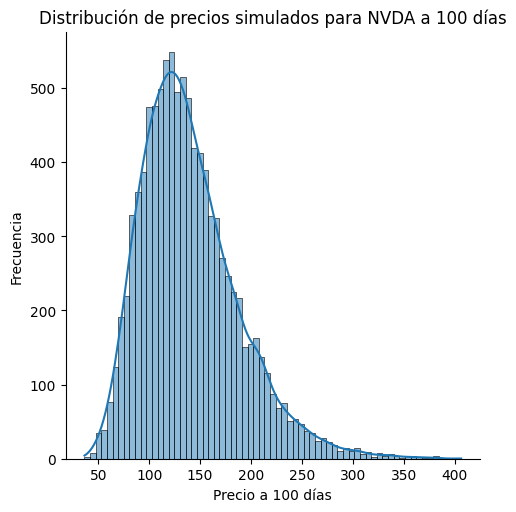

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Ingresar el ticker de la accion que se desea simular (Para la corrida uso "NVDA")
ticker_symbol = input("Ingresar ticker:").upper()

try:
    # Se define ticker a utilizar
    ticker = yf.Ticker(ticker_symbol)

    # Se obtienen datos historicos de precios (fecha limite mayo 2025)
    datos = ticker.history(start='2021-1-1', end='2025-5-1')
    datos = datos[['Close']]

    if datos.empty:
        print(f"No se encontraron datos para el ticker: {ticker_symbol} en el período especificado.")
    else:
        log_returns = np.log(datos / datos.shift(1))
        log_returns = log_returns.dropna()

        u = log_returns.mean()
        var = log_returns.var()
        drift = np.array(u - (0.5 * var))
        stdev = np.array(log_returns.std())
        days = 100 # cant de dias
        trials = 10000 # cant de simulaciones

        # Genero numeros aleatorios
        Z = norm.ppf(np.random.rand(days, trials))

        retornos_diarios = np.exp(drift + stdev * Z)
        camino_de_precios = np.zeros_like(retornos_diarios)
        camino_de_precios[0] = datos.iloc[-1]['Close']  # Acceder al valor 'Close'

        for t in range(1, days):
            camino_de_precios[t] = camino_de_precios[t - 1] * retornos_diarios[t]

        # Graficar las simulaciones
        plt.figure(figsize=(15, 6))
        plt.plot(pd.DataFrame(camino_de_precios))
        plt.xlabel("Número de días")
        plt.ylabel(f"Precio de {ticker_symbol}")
        plt.title(f"Simulación de {trials} caminos de precios para {ticker_symbol} a {days} días")
        plt.grid(True)
        plt.show()

        # Graficar la distribucion de precios al final del periodo
        plt.figure(figsize=(10, 6))
        sns.displot(pd.DataFrame(camino_de_precios).iloc[-1], kde=True)
        plt.xlabel(f"Precio a {days} días")
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de precios simulados para {ticker_symbol} a {days} días")
        plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")
    print("Por favor, verifica que el ticker ingresado sea válido.")